# **Problem Statement #2**

Perform a segmentation study on the
dataset to display useful information using
any visualization library.

In [56]:
import numpy as np
import pandas as pd

train_file = r"C:\Users\12489\Documents\Data\au_train.csv"
test_file = r"C:\Users\12489\Documents\Data\au_test.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

-----------------------------

## isolate the variables chosen earlier

In [57]:
train_slim = train_df[['age', 'education-num', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]
test_slim = test_df[['age', 'education-num', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]

In [58]:
train_slim = pd.get_dummies(train_slim, columns=['class'])
train_slim.drop(['class_ >50K'], axis=1, inplace=True)

train_slim['label'] = train_slim['class_ <=50K']
train_slim.drop(['class_ <=50K'], axis=1, inplace=True)

In [59]:
test_slim = pd.get_dummies(test_slim, columns=['class'])
test_slim.drop(['class_ >50K.'], axis=1, inplace=True)

test_slim['label'] = test_slim['class_ <=50K.']
test_slim.drop(['class_ <=50K.'], axis=1, inplace=True)

---------

# merge, to visualize both

In [60]:
df = pd.merge(train_slim, test_slim)

df.head()

,age,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,label
0,38,9,Not-in-family,Male,0,0,40,1
1,38,9,Not-in-family,Male,0,0,40,1
2,38,9,Not-in-family,Male,0,0,40,1
3,38,9,Not-in-family,Male,0,0,40,1
4,38,9,Not-in-family,Male,0,0,40,1


----------------------

# grouping by relationship

In [61]:
df.groupby(['sex', 'relationship'], as_index=False)['label'].sum()

,sex,relationship,label
0,Female,Not-in-family,7415.0
1,Female,Other-relative,178.0
2,Female,Own-child,8197.0
3,Female,Unmarried,4697.0
4,Female,Wife,375.0
5,Male,Husband,33748.0
6,Male,Not-in-family,10459.0
7,Male,Other-relative,337.0
8,Male,Own-child,14833.0
9,Male,Unmarried,436.0


In [62]:
df.groupby(['relationship'])['label'].agg(['mean', 'sum'])

,mean,sum
relationship,,
Husband,0.747017,33748.0
Not-in-family,0.995932,17874.0
Other-relative,1.000000,515.0
Own-child,0.999913,23030.0
Unmarried,0.999027,5133.0
Wife,0.669643,375.0


In [63]:
r_over_50 =df[df['label']==1].groupby(['relationship'])['label'].count().to_frame().reset_index()
r_under_50 =df[df['label']==0].groupby(['relationship'])['label'].count().to_frame().reset_index()

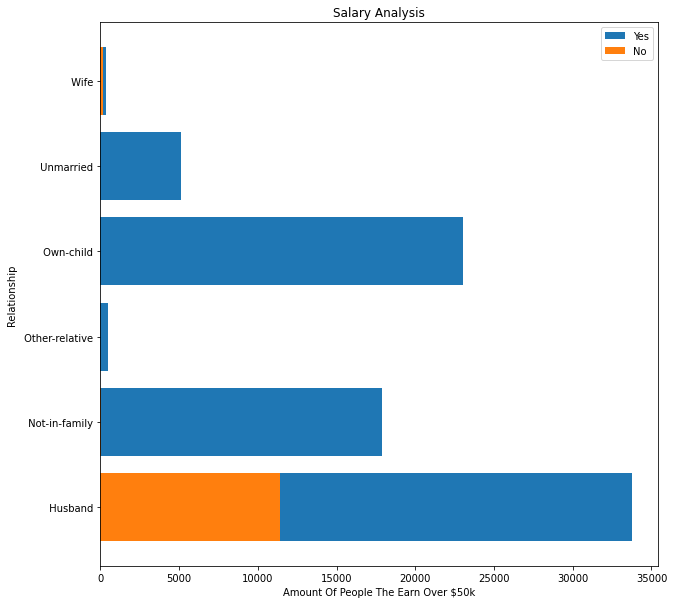

In [64]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))
plt.barh(r_over_50.relationship, r_over_50.label)
plt.barh(r_under_50.relationship, r_under_50.label)

plt.ylabel("Relationship",size=10)
plt.xlabel("Amount Of People The Earn Over $50k")
plt.legend(["Yes", "No"])
plt.title("Salary Analysis")

plt.show()


--------------

# grouping by age

In [65]:
df['age_bins'] = pd.cut(df['age'], bins=3, labels=('young', 'middle_age', 'old'))

df.head()

,age,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,label,age_bins
0,38,9,Not-in-family,Male,0,0,40,1,young
1,38,9,Not-in-family,Male,0,0,40,1,young
2,38,9,Not-in-family,Male,0,0,40,1,young
3,38,9,Not-in-family,Male,0,0,40,1,young
4,38,9,Not-in-family,Male,0,0,40,1,young


In [66]:
df.groupby(['age_bins'])['label'].agg(['mean', 'sum'])

,mean,sum
age_bins,,
young,0.927029,65439.0
middle_age,0.698317,15099.0
old,0.872611,137.0


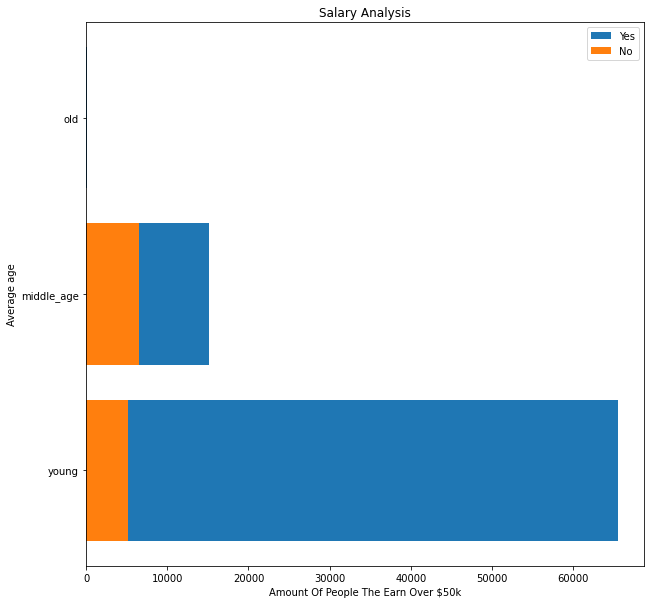

In [67]:
bins_over_50 =df[df['label']==1].groupby(['age_bins'])['label'].count().to_frame().reset_index()
bins_under_50 =df[df['label']==0].groupby(['age_bins'])['label'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(bins_over_50.age_bins, bins_over_50.label)
plt.barh(bins_under_50.age_bins, bins_under_50.label)

plt.ylabel("Average age",size=10)
plt.xlabel("Amount Of People The Earn Over $50k")
plt.legend(["Yes", "No"])
plt.title("Salary Analysis")

plt.show()

--------------------------

## grouping by male/female

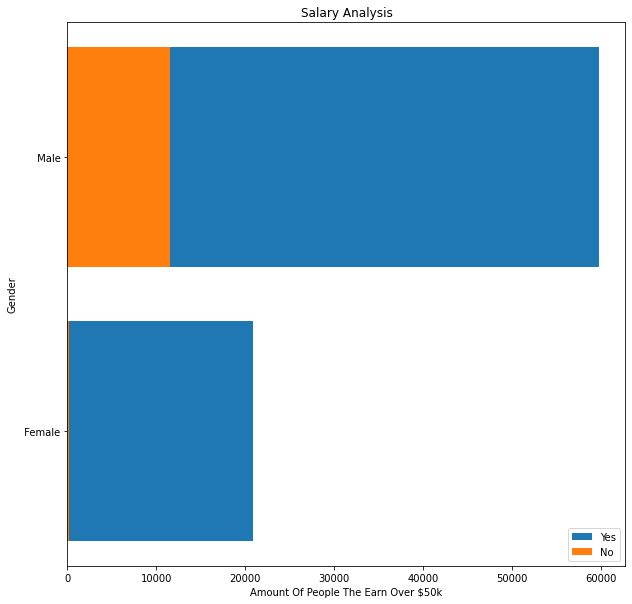

In [68]:
mf_over_50 =df[df['label']==1].groupby(['sex'])['label'].count().to_frame().reset_index()
mf_under_50 =df[df['label']==0].groupby(['sex'])['label'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(mf_over_50.sex, mf_over_50.label)
plt.barh(mf_under_50.sex, mf_under_50.label)

plt.ylabel("Gender",size=10)
plt.xlabel("Amount Of People The Earn Over $50k")
plt.legend(["Yes", "No"])
plt.title("Salary Analysis")

plt.show()